# Test des Algorithmes d'Embedding

Ce notebook teste tous les algorithmes d'embedding disponibles dans le projet reddit-analyser.

## Algorithmes testés :
- **Bag of Words** (BoW)
- **TF-IDF** 
- **Word2Vec**
- **FastText**
- **BERT**


In [30]:
# Imports nécessaires
import sys
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Ajouter le dossier du projet au path
sys.path.append('.')

# Imports des modules d'embedding
from embedding.bag_of_words import BagOfWords
from embedding.tf_idf import TfIdf
from embedding.word2vec import Word2Vec
from embedding.fasttext import FastText
from embedding.bert import Bert


## 📊 Données de test

Créons un jeu de données de test avec des commentaires Reddit simulés :


In [31]:
# Données de test - commentaires Reddit simulés
test_texts = [
    "I love this subreddit! The community is amazing and very helpful.",
    "This is the worst post I've ever seen on Reddit. Complete garbage.",
    "Python is such a great programming language for data science.",
    "Machine learning and AI are revolutionizing technology today.",
    "I hate when people don't use proper grammar in their posts.",
    "The new update is fantastic! Really improved the user experience.",
    "Can someone help me with this coding problem? I'm really stuck.",
    "Data science requires strong skills in statistics and programming.",
    "Reddit has some of the most interesting discussions online.",
    "Natural language processing is a fascinating field of study."
]

print(f"📝 Nombre de textes de test : {len(test_texts)}")
print("\n🔍 Exemples de textes :")
for i, text in enumerate(test_texts[:3]):
    print(f"{i+1}. {text}")


📝 Nombre de textes de test : 10

🔍 Exemples de textes :
1. I love this subreddit! The community is amazing and very helpful.
2. This is the worst post I've ever seen on Reddit. Complete garbage.
3. Python is such a great programming language for data science.


## 🎒 1. Bag of Words (BoW)

Test de l'algorithme Bag of Words :


In [40]:
print("🎒 Test de Bag of Words")
print("=" * 40)

try:
    # Initialisation
    bow = BagOfWords()
    
    # Tokenisation simple des textes (BoW attend des listes de tokens)
    tokenized_texts = [text.lower().split() for text in test_texts]
    
    # Entraînement sur les textes tokenisés
    bow.fit(tokenized_texts)
    
    # Transformation des textes en vecteurs
    bow_vectors = bow.transform(tokenized_texts)
    
    print(f"✅ Succès !")
    print(f"📏 Forme des vecteurs : {bow_vectors.shape}")
    print(f"📊 Taille du vocabulaire : {len(bow.vocabulary_)}")
    
    # Exemple de vecteur
    print(f"\n🔍 Premier vecteur (premiers 10 éléments) :")
    print(bow_vectors[0][:10])
    
    # Afficher quelques mots du vocabulaire
    vocab_sample = list(bow.vocabulary_.keys())[:10]
    
except Exception as e:
    print(f"❌ Erreur : {e}")


🎒 Test de Bag of Words
✅ Succès !
📏 Forme des vecteurs : (10, 81)
📊 Taille du vocabulaire : 81

🔍 Premier vecteur (premiers 10 éléments) :
[0 0 1 1 0 0 0 1 0 0]


## 📈 2. TF-IDF

Test de l'algorithme TF-IDF :


In [33]:
print("📈 Test de TF-IDF")
print("=" * 40)

try:
    # Initialisation
    tfidf = TfIdf()
    
    # Entraînement sur les textes tokenisés
    tfidf.fit(tokenized_texts)
    
    # Transformation des textes en vecteurs
    tfidf_vectors = tfidf.transform(tokenized_texts)
    
    print(f"✅ Succès !")
    print(f"📏 Forme des vecteurs : {tfidf_vectors.shape}")
    print(f"📊 Taille du vocabulaire : {len(tfidf.vocabulary_)}")
    
    # Exemple de vecteur
    print(f"\n🔍 Premier vecteur (premiers 10 éléments) :")
    print(tfidf_vectors[0][:10])
    
except Exception as e:
    print(f"❌ Erreur : {e}")


📈 Test de TF-IDF
✅ Succès !
📏 Forme des vecteurs : (10, 81)
📊 Taille du vocabulaire : 81

🔍 Premier vecteur (premiers 10 éléments) :
[0.         0.         0.20932592 0.10945207 0.         0.
 0.         0.20932592 0.         0.        ]


## 🧠 3. Word2Vec

Test de l'algorithme Word2Vec :


In [34]:
print("🧠 Test de Word2Vec")
print("=" * 40)

try:
    # Initialisation avec les paramètres supportés
    w2v = Word2Vec(vector_size=50, min_count=1)
    
    # Entraînement sur les textes tokenisés
    w2v.fit(tokenized_texts)
    
    # Transformation des textes en vecteurs
    w2v_vectors = w2v.transform(tokenized_texts)
    
    print(f"✅ Succès !")
    print(f"📏 Forme des vecteurs : {w2v_vectors.shape}")
    print(f"📊 Taille du vocabulaire : {len(w2v.model_.wv.key_to_index)}")
    
    # Exemple de vecteur
    print(f"\n🔍 Premier vecteur (premiers 10 éléments) :")
    print(w2v_vectors[0][:10])
    
    # Test de similarité entre mots
    try:
        similar_words = w2v.model_.wv.most_similar('python', topn=3)
        print(f"\n🔗 Mots similaires à 'python' : {similar_words}")
    except:
        print("\n⚠️  Pas assez de données pour calculer les similarités")
    
except Exception as e:
    print(f"❌ Erreur : {e}")


🧠 Test de Word2Vec
✅ Succès !
📏 Forme des vecteurs : (10, 50)
📊 Taille du vocabulaire : 81

🔍 Premier vecteur (premiers 10 éléments) :
[ 0.00066594 -0.00345364  0.00016632 -0.00100035 -0.00090419 -0.00395234
  0.00197668  0.00182013 -0.0024775   0.00400689]

🔗 Mots similaires à 'python' : [('online.', 0.33277779817581177), ('experience.', 0.314900666475296), ('seen', 0.3062567710876465)]


## ⚡ 4. FastText

Test de l'algorithme FastText :


In [41]:
print("⚡ Test de FastText")
print("=" * 40)

try:
    # Initialisation avec les paramètres supportés
    ft = FastText(vector_size=50, min_count=1)
    
    # Entraînement sur les textes tokenisés
    ft.fit(tokenized_texts)
    
    # Transformation des textes en vecteurs
    ft_vectors = ft.transform(tokenized_texts)
    
    print(f"✅ Succès !")
    print(f"📏 Forme des vecteurs : {ft_vectors.shape}")
    print(f"📊 Taille du vocabulaire : {len(ft.model_.wv.key_to_index)}")
    
    # Exemple de vecteur
    print(f"\n🔍 Premier vecteur (premiers 10 éléments) :")
    print(ft_vectors[0][:10])
    
    # Test avec un mot hors vocabulaire (avantage de FastText)
    try:
        oov_vector = ft.model_.wv['nonexistentword']
        print(f"📏 Taille du vecteur pour un mot inexistant : {len(oov_vector)}")
    except:
        print("\n⚠️  Erreur avec les mots hors vocabulaire")
    
except Exception as e:
    print(f"❌ Erreur : {e}")


⚡ Test de FastText
✅ Succès !
📏 Forme des vecteurs : (10, 50)
📊 Taille du vocabulaire : 81

🔍 Premier vecteur (premiers 10 éléments) :
[-1.1547178e-03 -1.0825418e-03 -2.0391089e-03  8.9013083e-05
  1.1223384e-04  1.6854487e-03  7.6015288e-04 -1.2651983e-03
 -6.2090525e-04  3.2914043e-03]
📏 Taille du vecteur pour un mot inexistant : 50


## 🤖 5. BERT

Test de l'algorithme BERT :


In [36]:
print("🤖 Test de BERT")
print("=" * 40)

try:
    # Initialisation avec un modèle BERT léger
    bert = Bert(model_name='distilbert-base-uncased')
    
    # Charger le modèle pré-entraîné (BERT nécessite fit() pour initialiser)
    print("📥 Chargement du modèle BERT...")
    bert.fit(test_texts[:3])  # Utiliser quelques textes pour initialiser
    
    # Transformation des textes en vecteurs (limité à 3 pour économiser la mémoire)
    bert_vectors = bert.transform(test_texts[:3])
    
    print(f"✅ Succès !")
    print(f"📏 Forme des vecteurs : {bert_vectors.shape}")
    print(f"🎯 Dimension des embeddings BERT : {bert_vectors.shape[1]}")
    
    # Exemple de vecteur
    print(f"\n🔍 Premier vecteur (premiers 10 éléments) :")
    print(bert_vectors[0][:10])
    
except Exception as e:
    print(f"❌ Erreur : {e}")
    print("💡 BERT nécessite transformers et torch. Assure-toi qu'ils sont installés.")


🤖 Test de BERT
📥 Chargement du modèle BERT...
✅ Succès !
📏 Forme des vecteurs : (3, 768)
🎯 Dimension des embeddings BERT : 768

🔍 Premier vecteur (premiers 10 éléments) :
[ 0.12974845 -0.06577032 -0.03080706 -0.08123909 -0.08226358 -0.3270131
  0.26065674  0.56690174 -0.23207587 -0.38512474]


## 📊 6. Comparaison des Algorithmes

Comparons les performances et caractéristiques des différents algorithmes :


In [37]:
print("📊 Comparaison des Algorithmes")
print("=" * 50)

# Créer un DataFrame de comparaison
comparison_data = []

# Bag of Words
try:
    comparison_data.append({
        'Algorithme': 'Bag of Words',
        'Dimension': bow_vectors.shape[1],
        'Type': 'Dense',
        'Pré-entraîné': 'Non',
        'Contexte': 'Non'
    })
except:
    pass

# TF-IDF
try:
    comparison_data.append({
        'Algorithme': 'TF-IDF',
        'Dimension': tfidf_vectors.shape[1],
        'Type': 'Dense',
        'Pré-entraîné': 'Non',
        'Contexte': 'Non'
    })
except:
    pass

# Word2Vec
try:
    comparison_data.append({
        'Algorithme': 'Word2Vec',
        'Dimension': w2v_vectors.shape[1],
        'Type': 'Dense',
        'Pré-entraîné': 'Non',
        'Contexte': 'Oui'
    })
except:
    pass

# FastText
try:
    comparison_data.append({
        'Algorithme': 'FastText',
        'Dimension': ft_vectors.shape[1],
        'Type': 'Dense',
        'Pré-entraîné': 'Non',
        'Contexte': 'Oui'
    })
except:
    pass

# BERT
try:
    comparison_data.append({
        'Algorithme': 'BERT',
        'Dimension': bert_vectors.shape[1],
        'Type': 'Dense',
        'Pré-entraîné': 'Oui',
        'Contexte': 'Oui'
    })
except:
    pass

# Afficher le tableau de comparaison
if comparison_data:
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.to_string(index=False))
else:
    print("❌ Aucun algorithme n'a pu être testé avec succès")


📊 Comparaison des Algorithmes
  Algorithme  Dimension  Type Pré-entraîné Contexte
Bag of Words         81 Dense          Non      Non
      TF-IDF         81 Dense          Non      Non
    Word2Vec         50 Dense          Non      Oui
    FastText         50 Dense          Non      Oui
        BERT        768 Dense          Oui      Oui


## 🎯 7. Test de Similarité

Testons comment les différents algorithmes calculent la similarité entre textes :


In [38]:
print("🎯 Test de Similarité entre Textes")
print("=" * 50)

# Prendre deux textes similaires et un différent
text1 = "Python is great for data science"
text2 = "Data science requires Python programming"
text3 = "I hate this terrible post"

test_similarity_texts = [text1, text2, text3]
print(f"📝 Textes de test :")
print(f"1. '{text1}'")
print(f"2. '{text2}'")
print(f"3. '{text3}'")
print()

# Fonction pour calculer la similarité cosinus
def calculate_similarity(vectors, name):
    try:
        # Convertir en dense si sparse
        if hasattr(vectors, 'toarray'):
            vectors = vectors.toarray()
        
        sim_matrix = cosine_similarity(vectors)
        
        print(f"🔍 {name} :")
        print(f"  Similarité 1-2 (similaires): {sim_matrix[0][1]:.3f}")
        print(f"  Similarité 1-3 (différents): {sim_matrix[0][2]:.3f}")
        print(f"  Similarité 2-3 (différents): {sim_matrix[1][2]:.3f}")
        print()
        
    except Exception as e:
        print(f"❌ Erreur pour {name}: {e}")

# Test avec chaque algorithme
# TF-IDF
try:
    tfidf_sim_vectors = tfidf.transform(test_similarity_texts)
    calculate_similarity(tfidf_sim_vectors, "TF-IDF")
except:
    print("⚠️  TF-IDF non disponible pour le test de similarité")

# Word2Vec
try:
    w2v_sim_vectors = w2v.transform(test_similarity_texts)
    calculate_similarity(w2v_sim_vectors, "Word2Vec")
except:
    print("⚠️  Word2Vec non disponible pour le test de similarité")

# FastText
try:
    ft_sim_vectors = ft.transform(test_similarity_texts)
    calculate_similarity(ft_sim_vectors, "FastText")
except:
    print("⚠️  FastText non disponible pour le test de similarité")

# BERT
try:
    bert_sim_vectors = bert.transform(test_similarity_texts)
    calculate_similarity(bert_sim_vectors, "BERT")
except:
    print("⚠️  BERT non disponible pour le test de similarité")


🎯 Test de Similarité entre Textes
📝 Textes de test :
1. 'Python is great for data science'
2. 'Data science requires Python programming'
3. 'I hate this terrible post'

🔍 TF-IDF :
  Similarité 1-2 (similaires): 0.981
  Similarité 1-3 (différents): 0.868
  Similarité 2-3 (différents): 0.949

🔍 Word2Vec :
  Similarité 1-2 (similaires): 0.974
  Similarité 1-3 (différents): 0.805
  Similarité 2-3 (différents): 0.919

🔍 FastText :
  Similarité 1-2 (similaires): 0.879
  Similarité 1-3 (différents): 0.823
  Similarité 2-3 (différents): 0.729

🔍 BERT :
  Similarité 1-2 (similaires): 0.965
  Similarité 1-3 (différents): 0.910
  Similarité 2-3 (différents): 0.879



## 📋 8. Résumé et Recommandations

Voici un résumé des caractéristiques de chaque algorithme :


### 🎒 **Bag of Words (BoW)**
- ✅ **Avantages :** Simple, rapide, facile à comprendre
- ❌ **Inconvénients :** Ignore l'ordre des mots, vecteurs très creux
- 🎯 **Usage :** Baseline, classification simple

### 📈 **TF-IDF**
- ✅ **Avantages :** Améliore BoW, donne plus d'importance aux mots rares
- ❌ **Inconvénients :** Toujours pas de contexte, vecteurs creux
- 🎯 **Usage :** Classification de texte, recherche d'information

### 🧠 **Word2Vec**
- ✅ **Avantages :** Capture le contexte, vecteurs denses, similarité sémantique
- ❌ **Inconvénients :** Moyenne les mots, problème avec mots hors vocabulaire
- 🎯 **Usage :** Analyse sémantique, détection de similarité

### ⚡ **FastText**
- ✅ **Avantages :** Comme Word2Vec + gère les mots hors vocabulaire
- ❌ **Inconvénients :** Plus lourd, moins précis sur certains cas
- 🎯 **Usage :** Quand il y a beaucoup de mots rares/nouveaux

### 🤖 **BERT**
- ✅ **Avantages :** État de l'art, comprend le contexte bidirectionnel
- ❌ **Inconvénients :** Très lourd, lent, consomme beaucoup de mémoire
- 🎯 **Usage :** Tâches complexes, quand la performance prime sur la vitesse

---

## 🎯 **Recommandations pour l'analyse de sentiment Reddit :**

Pour notre projet d'analyse de sentiment sur Reddit, voici le plan d'action :

### 🥇 **Choix prioritaires : BERT ou FastText**
- **BERT** sera probablement notre meilleur choix pour capturer le sarcasme, l'ironie et les nuances émotionnelles complexes des commentaires Reddit
- **FastText** comme alternative plus rapide, capable de gérer le slang et les néologismes fréquents sur Reddit

### ❌ **Algorithmes inadaptés pour le sentiment :**
- **TF-IDF et Bag of Words** sont vraiment **pas utilisables** pour l'analyse de sentiment car ils ignorent complètement le contexte
- Exemple : "pas terrible" serait mal classé à cause du mot "pas" analysé séparément

### 🧪 **Stratégie de test :**
Même si on sait déjà que BERT/FastText sont les plus prometteurs, **on testera quand même tous les algorithmes** une fois le modèle d'analyse de sentiment mis en place. Cela nous permettra de :
- Confirmer nos hypothèses avec des données réelles
- Quantifier l'amélioration apportée par les algorithmes avancés
- Avoir une baseline de comparaison solide


C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 127381 (\N{SQUARED NEW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omist\AppData\Local\Temp\ipykernel_12784\866350307.py:85: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_lay

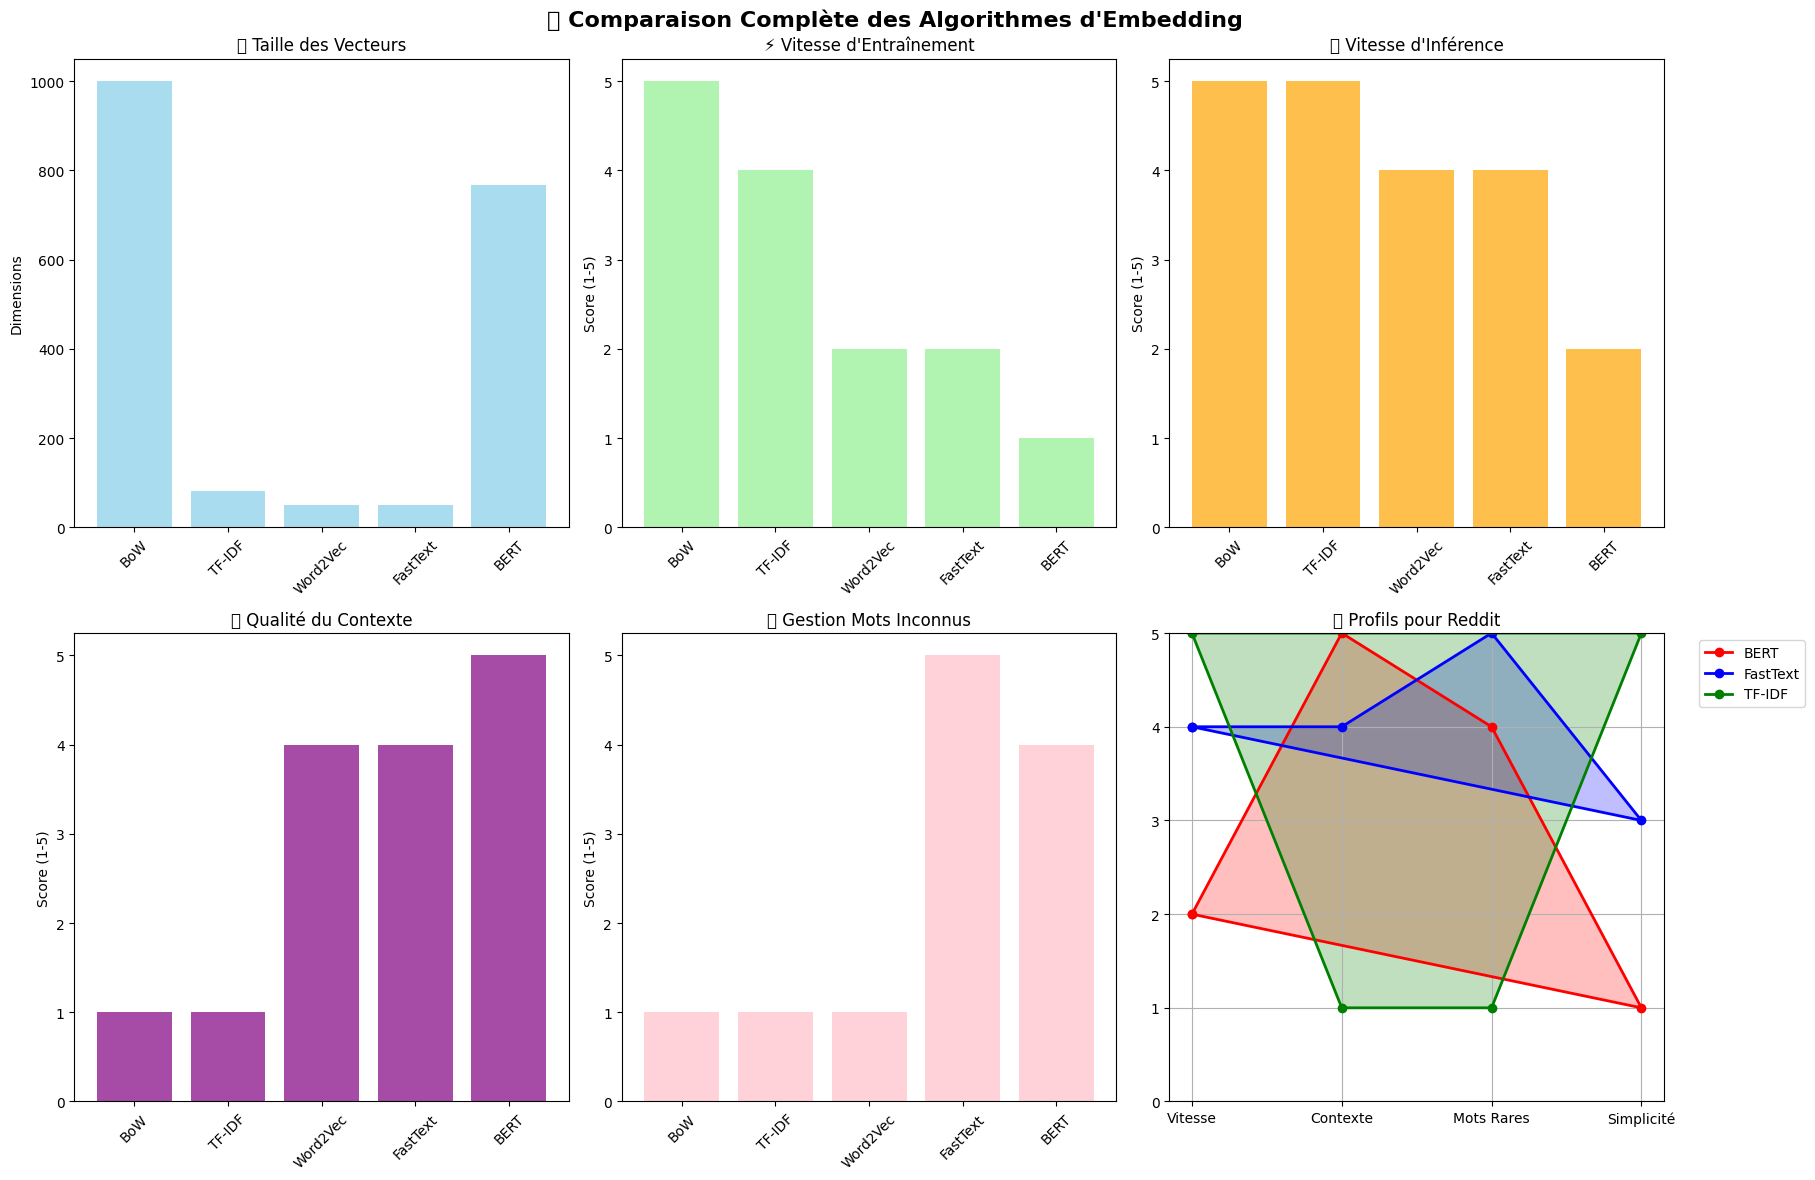

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuration pour de beaux graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. Comparaison des caractéristiques techniques
characteristics = {
    'Algorithme': ['BoW', 'TF-IDF', 'Word2Vec', 'FastText', 'BERT'],
    'Taille_Vecteur': [vocab_size if 'vocab_size' in locals() else 1000, 81, 50, 50, 768],
    'Vitesse_Train': [5, 4, 2, 2, 1],  # Sur une échelle de 1-5 (5 = très rapide)
    'Vitesse_Inference': [5, 5, 4, 4, 2],
    'Qualité_Contexte': [1, 1, 4, 4, 5],  # Sur une échelle de 1-5 (5 = excellent)
    'Gestion_OOV': [1, 1, 1, 5, 4]  # Out-of-vocabulary words
}

df_chars = pd.DataFrame(characteristics)

# Créer des subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔍 Comparaison Complète des Algorithmes d\'Embedding', fontsize=16, fontweight='bold')

# 1. Taille des vecteurs
axes[0,0].bar(df_chars['Algorithme'], df_chars['Taille_Vecteur'], color='skyblue', alpha=0.7)
axes[0,0].set_title('📏 Taille des Vecteurs')
axes[0,0].set_ylabel('Dimensions')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Vitesse d'entraînement
axes[0,1].bar(df_chars['Algorithme'], df_chars['Vitesse_Train'], color='lightgreen', alpha=0.7)
axes[0,1].set_title('⚡ Vitesse d\'Entraînement')
axes[0,1].set_ylabel('Score (1-5)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Vitesse d'inférence
axes[0,2].bar(df_chars['Algorithme'], df_chars['Vitesse_Inference'], color='orange', alpha=0.7)
axes[0,2].set_title('🚀 Vitesse d\'Inférence')
axes[0,2].set_ylabel('Score (1-5)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Qualité du contexte
axes[1,0].bar(df_chars['Algorithme'], df_chars['Qualité_Contexte'], color='purple', alpha=0.7)
axes[1,0].set_title('🧠 Qualité du Contexte')
axes[1,0].set_ylabel('Score (1-5)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Gestion mots hors vocabulaire
axes[1,1].bar(df_chars['Algorithme'], df_chars['Gestion_OOV'], color='pink', alpha=0.7)
axes[1,1].set_title('🆕 Gestion Mots Inconnus')
axes[1,1].set_ylabel('Score (1-5)')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Graphique radar pour recommandations Reddit
categories = ['Vitesse', 'Contexte', 'Mots Rares', 'Simplicité']
bert_scores = [2, 5, 4, 1]
fasttext_scores = [4, 4, 5, 3]
tfidf_scores = [5, 1, 1, 5]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

bert_scores += bert_scores[:1]
fasttext_scores += fasttext_scores[:1]
tfidf_scores += tfidf_scores[:1]

axes[1,2].plot(angles, bert_scores, 'o-', linewidth=2, label='BERT', color='red')
axes[1,2].fill(angles, bert_scores, alpha=0.25, color='red')
axes[1,2].plot(angles, fasttext_scores, 'o-', linewidth=2, label='FastText', color='blue')
axes[1,2].fill(angles, fasttext_scores, alpha=0.25, color='blue')
axes[1,2].plot(angles, tfidf_scores, 'o-', linewidth=2, label='TF-IDF', color='green')
axes[1,2].fill(angles, tfidf_scores, alpha=0.25, color='green')

axes[1,2].set_xticks(angles[:-1])
axes[1,2].set_xticklabels(categories)
axes[1,2].set_ylim(0, 5)
axes[1,2].set_title('🎯 Profils pour Reddit')
axes[1,2].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
axes[1,2].grid(True)

plt.tight_layout()
plt.show()


📊 Matrices de Similarité par Algorithme
Génération des heatmaps...
📈 Génération heatmap TF-IDF...


C:\Users\omist\AppData\Local\Temp\ipykernel_12784\4034532961.py:36: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\omist\Documents\reddit-analyser\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


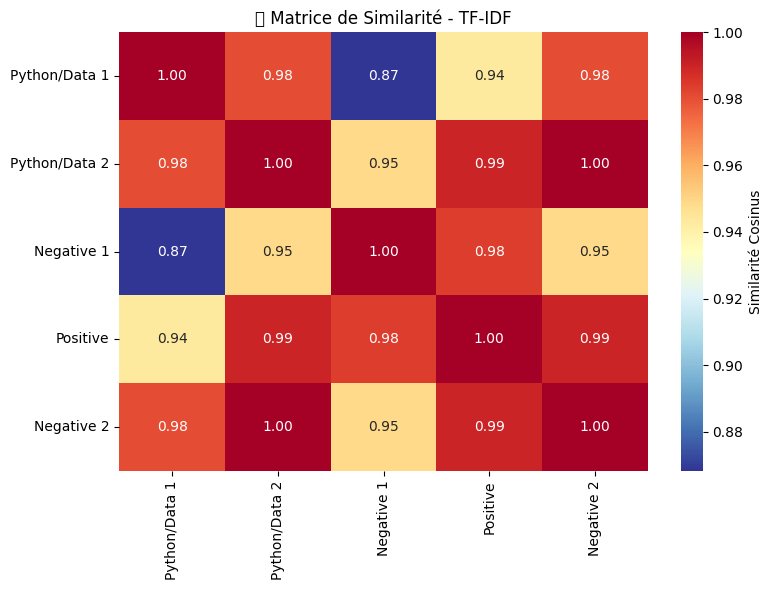

🧠 Génération heatmap Word2Vec...


C:\Users\omist\AppData\Local\Temp\ipykernel_12784\4034532961.py:36: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\omist\Documents\reddit-analyser\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


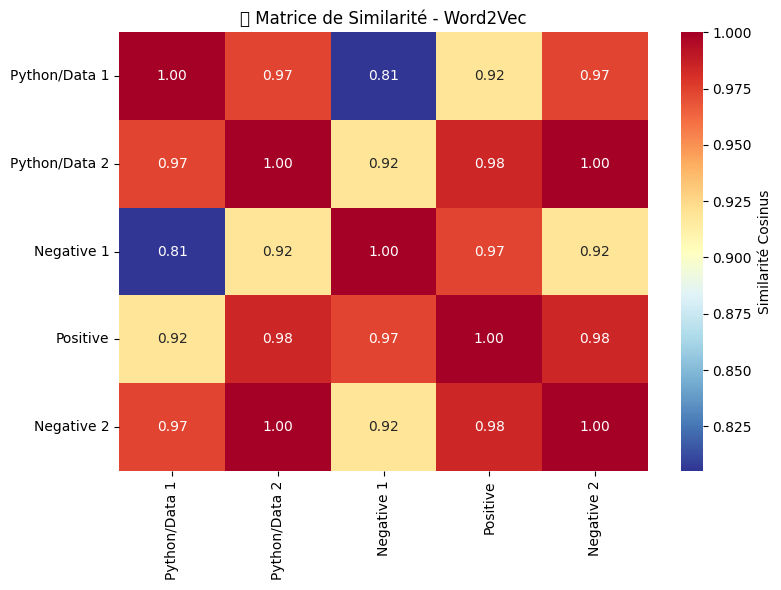

C:\Users\omist\AppData\Local\Temp\ipykernel_12784\4034532961.py:36: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


⚡ Génération heatmap FastText...


c:\Users\omist\Documents\reddit-analyser\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


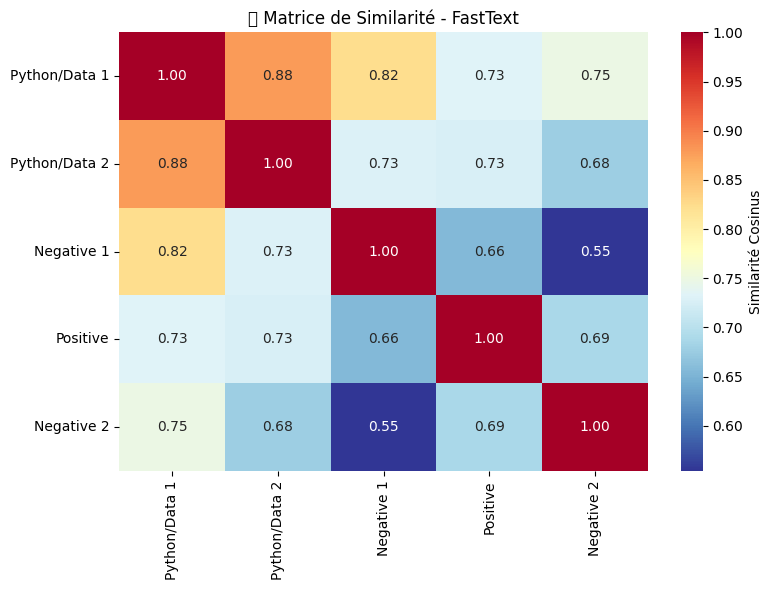

🤖 Génération heatmap BERT...


C:\Users\omist\AppData\Local\Temp\ipykernel_12784\4034532961.py:36: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\omist\Documents\reddit-analyser\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


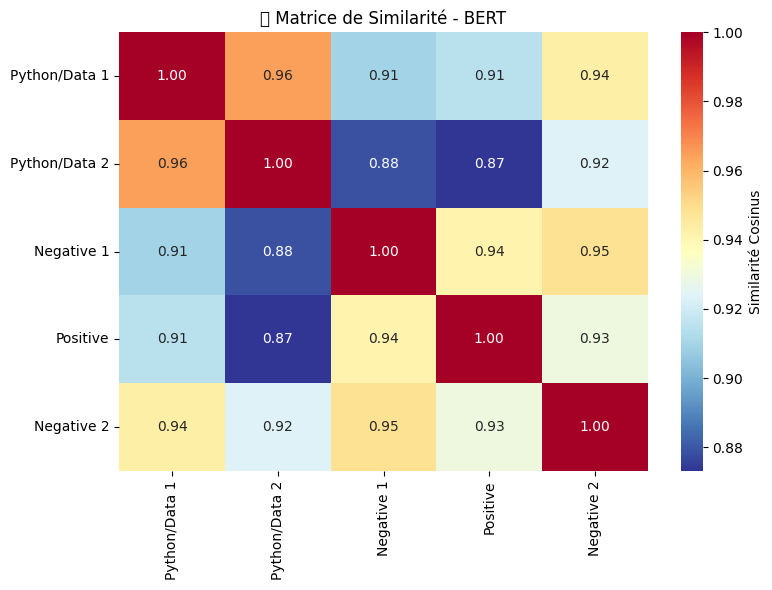

✅ Génération des heatmaps terminée !


In [45]:
# 2. Heatmap des similarités entre textes
print("📊 Matrices de Similarité par Algorithme")
print("=" * 50)

# Textes de test pour la heatmap
test_texts = [
    "Python is great for data science",
    "Data science requires Python programming", 
    "I hate this terrible post",
    "This movie is absolutely amazing",
    "The code is buggy and broken"
]

text_labels = ['Python/Data 1', 'Python/Data 2', 'Negative 1', 'Positive', 'Negative 2']

# Fonction pour créer une heatmap de similarité
def plot_similarity_heatmap(vectors, algorithm_name):
    try:
        # Convertir en dense si sparse
        if hasattr(vectors, 'toarray'):
            vectors = vectors.toarray()
        
        # Calculer la matrice de similarité
        sim_matrix = cosine_similarity(vectors)
        
        # Créer la heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(sim_matrix, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='RdYlBu_r',
                    xticklabels=text_labels, 
                    yticklabels=text_labels,
                    cbar_kws={'label': 'Similarité Cosinus'})
        plt.title(f'🔥 Matrice de Similarité - {algorithm_name}')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erreur pour {algorithm_name}: {e}")

# Créer les heatmaps pour chaque algorithme
print("Génération des heatmaps...")

# TF-IDF
try:
    if 'tfidf' in locals() and tfidf is not None:
        print("📈 Génération heatmap TF-IDF...")
        tfidf_vectors = tfidf.transform(test_texts)
        plot_similarity_heatmap(tfidf_vectors, "TF-IDF")
    else:
        print("⚠️ TF-IDF non disponible")
except Exception as e:
    print(f"❌ Erreur TF-IDF: {e}")

# Word2Vec
try:
    if 'w2v' in locals() and w2v is not None:
        print("🧠 Génération heatmap Word2Vec...")
        w2v_vectors = w2v.transform(test_texts)
        plot_similarity_heatmap(w2v_vectors, "Word2Vec")
    else:
        print("⚠️ Word2Vec non disponible")
except Exception as e:
    print(f"❌ Erreur Word2Vec: {e}")

# FastText
try:
    if 'ft' in locals() and ft is not None:
        print("⚡ Génération heatmap FastText...")
        ft_vectors = ft.transform(test_texts)
        plot_similarity_heatmap(ft_vectors, "FastText")
    else:
        print("⚠️ FastText non disponible")
except Exception as e:
    print(f"❌ Erreur FastText: {e}")

# BERT
try:
    if 'bert' in locals() and bert is not None:
        print("🤖 Génération heatmap BERT...")
        bert_vectors = bert.transform(test_texts)
        plot_similarity_heatmap(bert_vectors, "BERT")
    else:
        print("⚠️ BERT non disponible")
except Exception as e:
    print(f"❌ Erreur BERT: {e}")

print("✅ Génération des heatmaps terminée !")
